                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   

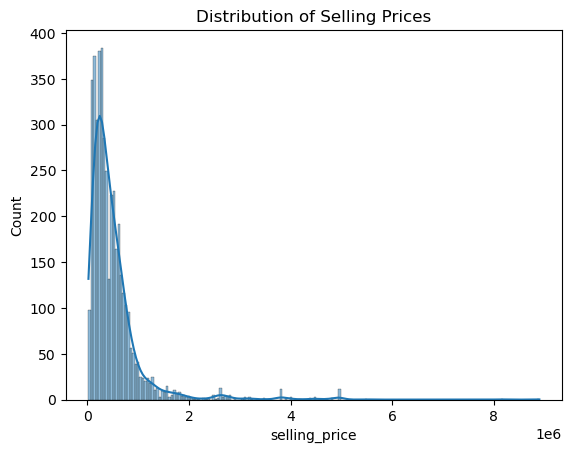

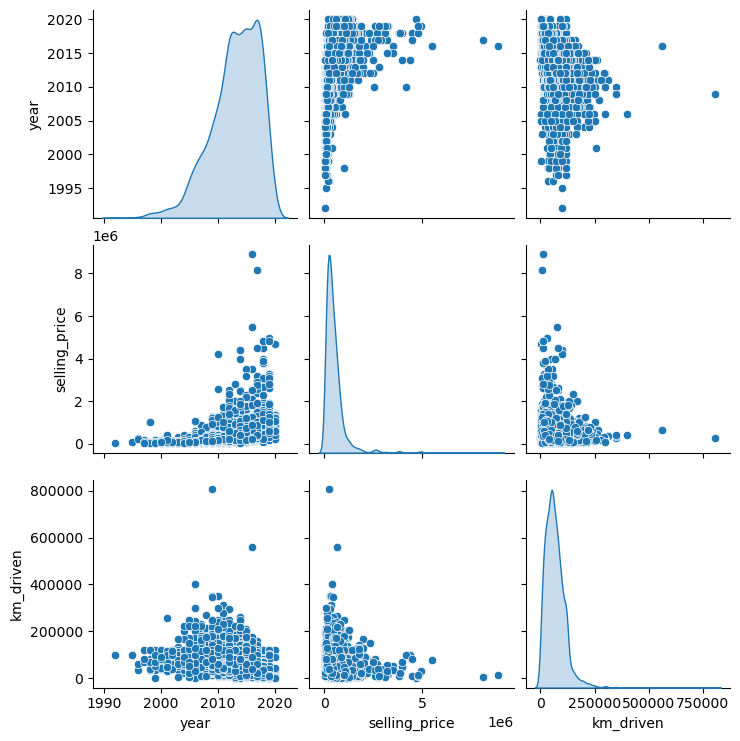

In [2]:
# Importando librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargando los datos
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

# Revisando las primeras filas para entender el conjunto de datos
print(df.head())

# Descripción estadística de las columnas numéricas
print(df.describe())

# Revisando las columnas y tipos de datos
print(df.info())

# Visualizando la distribución de la variable objetivo (selling_price)
sns.histplot(df['selling_price'], kde=True)
plt.title('Distribution of Selling Prices')
plt.show()

# Relación entre las variables numéricas
sns.pairplot(df, diag_kind='kde')
plt.show()

In [4]:
# Verificar valores nulos
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [6]:
# a continuación creare una nueva columna llamada brand(marca) sustituyendola por la columna (name) del archivo original
# esto lo hago para extraer la marca del coche 
# Extraer la primera palabra como la marca del coche
df['brand'] = df['name'].str.split(' ').str[0]

#luego verificamos las marcas extraidas
print(df['brand'].unique())

#a continuación eliminamos la columna 'name' por que ya no es necesaria
df = df.drop(columns=['name'])

# y por ultimo mostramos las primeras filas de nuestro DataFrame
print(df.head())

['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']
   year  selling_price  km_driven    fuel seller_type transmission  \
0  2007          60000      70000  Petrol  Individual       Manual   
1  2007         135000      50000  Petrol  Individual       Manual   
2  2012         600000     100000  Diesel  Individual       Manual   
3  2017         250000      46000  Petrol  Individual       Manual   
4  2014         450000     141000  Diesel  Individual       Manual   

          owner    brand  
0   First Owner   Maruti  
1   First Owner   Maruti  
2   First Owner  Hyundai  
3   First Owner   Datsun  
4  Second Owner    Honda  


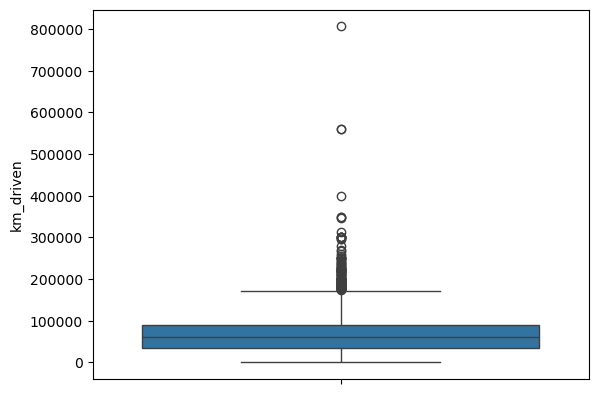

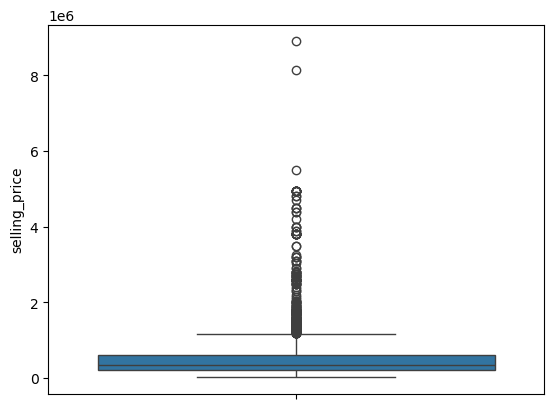

In [10]:
#a continuación verifico los valores atipicos en las columnas 'km_driven' y 'selling_price', ya que estos afectan negativamente a mi 
# modelo de Regresión Lineal
# Importamos primero las librerias
import seaborn as sns
import matplotlib.pyplot as plt

# luego se visualiza los valores atipicos de nuestras columnas 'km_driven' y 'selling_price'
sns.boxplot(df['km_driven'])
plt.show()

sns.boxplot(df['selling_price'])
plt.show()

In [14]:
# ahora creare una variable df_clean para trabajar con una version limpia de mi Dataframe original
df_clean = df.copy()

In [16]:
# ahora filtrare los datos con valores atipicos de la columna 'km_driven' ya que evidencie que se encuentran despues de 500,000 kilometros recorridos
# Filtrar outliers en km_driven
df_clean = df_clean[df_clean['km_driven'] < 500000]

In [18]:
# luego procedemos a mostrar nuestro DataFrame Limpio
print(df_clean)

      year  selling_price  km_driven    fuel seller_type transmission  \
0     2007          60000      70000  Petrol  Individual       Manual   
1     2007         135000      50000  Petrol  Individual       Manual   
2     2012         600000     100000  Diesel  Individual       Manual   
3     2017         250000      46000  Petrol  Individual       Manual   
4     2014         450000     141000  Diesel  Individual       Manual   
...    ...            ...        ...     ...         ...          ...   
4335  2014         409999      80000  Diesel  Individual       Manual   
4336  2014         409999      80000  Diesel  Individual       Manual   
4337  2009         110000      83000  Petrol  Individual       Manual   
4338  2016         865000      90000  Diesel  Individual       Manual   
4339  2016         225000      40000  Petrol  Individual       Manual   

             owner    brand  
0      First Owner   Maruti  
1      First Owner   Maruti  
2      First Owner  Hyundai  
3  

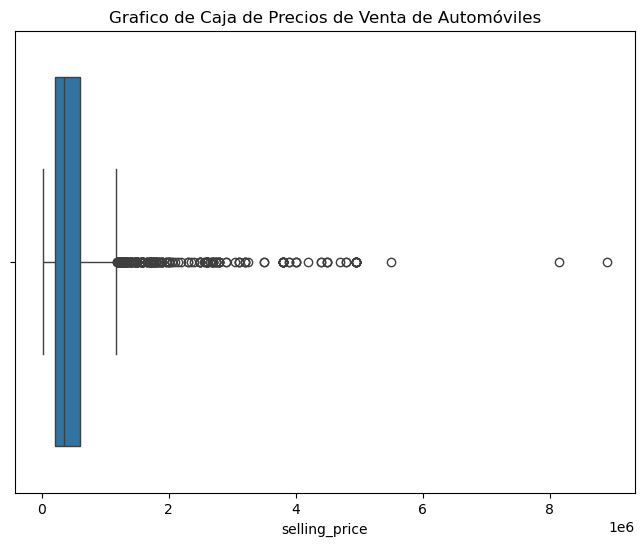

In [22]:
# ahora procedo a identificar nuevamente valores atipicos en la columna 'selling_price' mediante un grafico como boxplot
# Gráfico de caja para visualizar los valores atípicos en 'selling_price'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['selling_price'])
plt.title('Grafico de Caja de Precios de Venta de Automóviles')
plt.show()

In [24]:
# ahora voy a calcular el rango intercuartilico (IQR) para encontrar outliers (valores atipicos) para la columna 'selling_price'
# Calculando el IQR para la columna 'selling_price'
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1

# Definiendo límites para detectar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mostrando los límites calculados
print(f'Valores por debajo de {lower_bound} y por encima de {upper_bound} se consideran atípicos.')


Valores por debajo de -378125.625 y por encima de 1186875.375 se consideran atípicos.


In [26]:
# ya como tengo los limites, puedo filtrar los datos de la columna 'selling_price' y eliminar aquellos atipicos
# Filtrar outliers en 'selling_price'
df_clean = df[(df['selling_price'] >= lower_bound) & (df['selling_price'] <= upper_bound)]

# Ver el nuevo DataFrame sin valores atípicos
print(df_clean.shape)
print(df_clean.describe())

(4069, 8)
              year  selling_price      km_driven
count  4069.000000   4.069000e+03    4069.000000
mean   2012.882035   3.923786e+05   67498.617105
std       4.223110   2.481128e+05   46957.678504
min    1992.000000   2.000000e+04       1.000000
25%    2010.000000   2.000000e+05   35000.000000
50%    2013.000000   3.400000e+05   60000.000000
75%    2016.000000   5.500000e+05   90000.000000
max    2020.000000   1.165000e+06  806599.000000


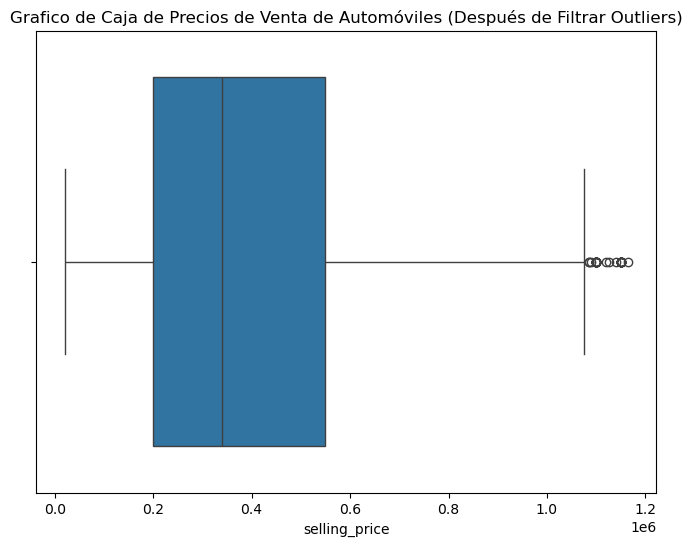

In [30]:
# con este paso verifique los outliers que fueron eliminados
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['selling_price'])
plt.title('Grafico de Caja de Precios de Venta de Automóviles (Después de Filtrar Outliers)')
plt.show()

In [32]:
# ya que he realizado  hasta el momento lo que es la verificación y el manejo de valores faltantes (nulos) y no encontramos, procedi a realizar la sustitución o transformación de la columna 'name' a la columna 'brand', que es la marca, luego detecte y maneje los valores atipicos con grafico de caja o bigotes de gato, a las columnas 'selling_price' y 'km_driven'
# ahora procedere a codificar variables categoricas usando one-hot encoding ( lo utilizo por que las columnas 'fuel', 'seller_type', 'transmission', y 'owner' son variables categoricas que deben ser convertidas a variables númericas antes de usarlas en mi modelo de regresion lineal)
# convirtiendo variables categoricas en variables numericas
# Codificación one-hot
df_clean = pd.get_dummies(df_clean, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

In [34]:
# ahora procedere a realizar el escalado de caracteristicas a las columnas 'km_driven' y 'year' ya que pueden tener rangos muy diferentes, lo que puede afectar al rendimiento de mi modelo de regresión lineal
# estandarización: ajusto la media a 0 y la desviación estándar a 1.
from sklearn.preprocessing import StandardScaler

# Creando un escalador
scaler = StandardScaler()

# Escalando las columnas numéricas
df_clean[['km_driven', 'year']] = scaler.fit_transform(df_clean[['km_driven', 'year']])

In [36]:
# ahora divido el dataset en Train (entrenamiento) y Test (prueba)
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = df_clean.drop(columns=['selling_price'])
y = df_clean['selling_price']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# luego de hacer todos estos cambios, verifico que el DataFrame este en orden
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4069 entries, 0 to 4339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          4069 non-null   float64
 1   selling_price                 4069 non-null   int64  
 2   km_driven                     4069 non-null   float64
 3   brand                         4069 non-null   object 
 4   fuel_Diesel                   4069 non-null   bool   
 5   fuel_Electric                 4069 non-null   bool   
 6   fuel_LPG                      4069 non-null   bool   
 7   fuel_Petrol                   4069 non-null   bool   
 8   seller_type_Individual        4069 non-null   bool   
 9   seller_type_Trustmark Dealer  4069 non-null   bool   
 10  transmission_Manual           4069 non-null   bool   
 11  owner_Fourth & Above Owner    4069 non-null   bool   
 12  owner_Second Owner            4069 non-null   bool   
 13  owner_Te

In [40]:
# como los valores que estoy utilizando en las columnas 'year' y 'km_driven' son de tipo entero, realizare la conversion de Float a Int
# Convertir 'year' y 'km_driven' a enteros
df['year'] = df['year'].astype(int)  
df['km_driven'] = df['km_driven'].astype(int)  
# ventajas: eficiencia: reduce el uso de memoria. claridad: un Int es mas claro para representar años o conteos, en lugar de un float.

In [44]:
# en cuanto a las columnas 'brand' como su tipo de dato esta en object, debo aplicar el One-Hot-Enconding ya que su objetivo es convertir los valores unicos en columnas binarias, esto lo hago por que al hacer mi modelo de regresion lineal si tengo columnas con nombres de tipo category o object, que no sean numericos no me deja manejarlo y ver los resultados, deben de ser numericos. 
# Aplicar One-Hot Encoding a la columna 'brand'
df = pd.get_dummies(df, columns=['brand'], drop_first=True)

In [48]:
# # tambien le aplico el One-Hot Enconding a mis otras variables 
# Aplicando One-Hot Encoding a todas las columnas categóricas
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

In [50]:
# ahora imprimo los nombres de las columnas para confirmar los nombres generados por get_dummies():
print(df.columns)

Index(['year', 'selling_price', 'km_driven', 'brand_Audi', 'brand_BMW',
       'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun', 'brand_Fiat',
       'brand_Force', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Land',
       'brand_MG', 'brand_Mahindra', 'brand_Maruti', 'brand_Mercedes-Benz',
       'brand_Mitsubishi', 'brand_Nissan', 'brand_OpelCorsa', 'brand_Renault',
       'brand_Skoda', 'brand_Tata', 'brand_Toyota', 'brand_Volkswagen',
       'brand_Volvo', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')


In [52]:
# ahora procedo a realizar mi modelo de Regresión Lineal
# Importando las librerías necesarias para mi modelo de Regresión Lienal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Definiendo las características (X) con las nuevas columnas generadas por One-Hot Encoding (Variables Independientes)
X = df[['year', 'km_driven'] + 
       [col for col in df.columns if col.startswith('brand_')] +  # Columnas de 'brand'
       [col for col in df.columns if col.startswith('fuel_')] +   # Columnas de 'fuel'
       [col for col in df.columns if col.startswith('seller_type_')] +  # Columnas de 'seller_type'
       [col for col in df.columns if col.startswith('transmission_')] +  # Columnas de 'transmission'
       [col for col in df.columns if col.startswith('owner_')]]  # Columnas de 'owner'

# Definiendo la variable objetivo (y) (variable dependiente)
y = df['selling_price']

# Dividiendo los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creando el modelo de regresión lineal
model = LinearRegression()

# Entrenando el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Haciendo predicciones sobre el conjunto de prueba (Test)
y_pred = model.predict(X_test)

# Evaluando el modelo
mse = mean_squared_error(y_test, y_pred)  # Error Cuadrático Medio (Mean Squared Error)
r2 = r2_score(y_test, y_pred)  # Coeficiente de Determinación (R-squared)

# Mostrando los resultados de la evaluación
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R^2): {r2}')

Mean Squared Error (MSE): 143459417012.78122
R-squared (R^2): 0.5299037175164801


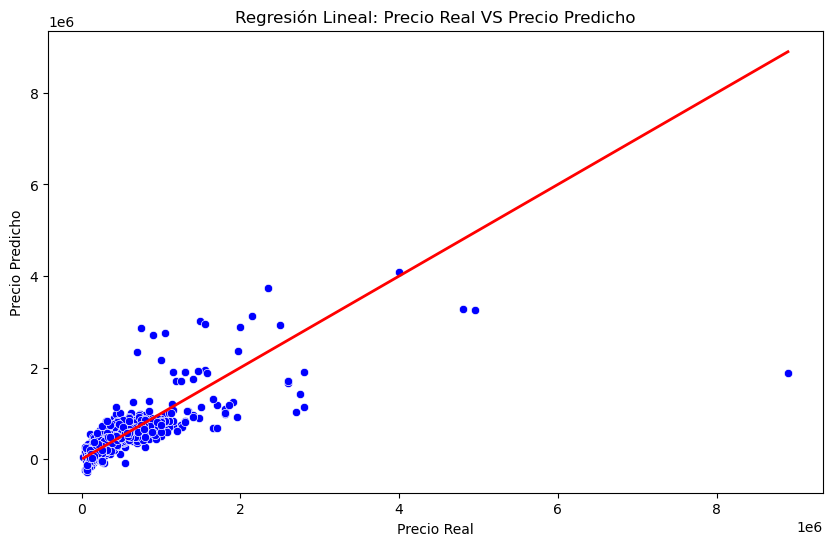

In [56]:
# ahora mostramos la grafica del modelo de Regresión Lineal:
# Creando una gráfica de dispersión (scatter plot) entre el precio real y el precio predicho
plt.figure(figsize=(10,6))

# Dibujando la gráfica de dispersión para los valores reales vs predichos
sns.scatterplot(x=y_test, y=y_pred, color="blue")

# Dibujando una línea de referencia (diagonal) que muestra dónde los valores predichos serían iguales a los reales
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)

# títulos y etiquetas
plt.title('Regresión Lineal: Precio Real VS Precio Predicho')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')

# Mostrar la gráfica
plt.show()